In [58]:
#Step1: Importing necessary Libraries:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [72]:
#Step 2) Import the data set
iris_df=pd.read_excel(r"E:\Data_Analysis\Iris_data.xlsx")
iris_df.head(10)

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
5,5,5.4,3.9,1.7,0.4
6,6,4.6,3.4,1.4,0.3
7,7,5.0,3.4,1.5,0.2
8,8,4.4,2.9,1.4,0.2
9,9,4.9,3.1,1.5,0.1


In [73]:
#Step 3) Analysis and Preprocessing
#Dropping the unwanted column unnamed:0 since it is same as index
iris_df1=iris_df.copy()
iris_df1.head(10)

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
5,5,5.4,3.9,1.7,0.4
6,6,4.6,3.4,1.4,0.3
7,7,5.0,3.4,1.5,0.2
8,8,4.4,2.9,1.4,0.2
9,9,4.9,3.1,1.5,0.1


In [74]:
iris_df1.drop("Unnamed: 0",inplace=True, axis=1)
iris_df1.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [25]:
#Here, main thing no need for train and test split, main agenda is to group the data by number of clusters.
iris_df1.isna().sum()  #No missing value present

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [26]:
iris_df1.describe() #checking for any anomoly like min, max value '0',etc.,

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris_df1.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [75]:
#As from the dataset, it can be seen that, that value increases as row increases. In order to normalise the data before clustering, scaling need to be done.
data_scaled=normalize(iris_df1)
print(data_scaled)

[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.786991   0.55745196 0.26233033 0.03279129]
 [0.82307218 0.51442011 0.24006272 0.01714734]
 [0.8025126  0.55989251 0.20529392 0.01866308]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.77381111 0.59732787 0.2036345  0.05430253]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.80327412 0.55126656 0.22050662 0.04725142]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.8173379  0.51462016 0.25731008 0.03027177]
 [0.78591858 

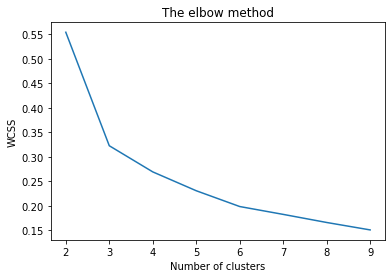

In [76]:
#Step: 4) K means Clusting model:  #Using Elbow method
wcss=[]  #within_sum_of_squares method
for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  #inertia for measures how well a dataset is clustered by model
plt.plot(range(2, 10), wcss) #To visual the elbow graph
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [77]:
#Now we know the number of cluster, i.e, K value is 2 or 3,
#Since the data scaled in array format, changing to dataframe
colum_name=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]
iris_df2=pd.DataFrame(data_scaled,columns=colum_name)
iris_df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [85]:
kmeans = KMeans(n_clusters = 2, init ='random') # calling the model, K value either 2 or 3, init is a method for choosing centroid method
y_kmeans = kmeans.fit_predict(iris_df2) # predict the values
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


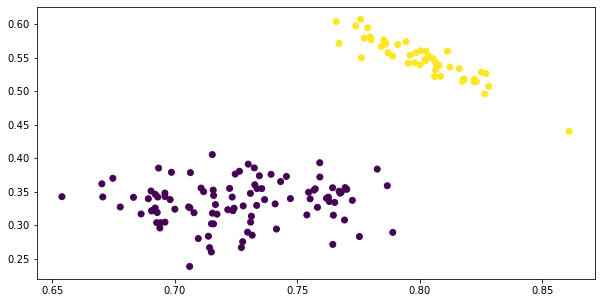

In [86]:
#To visualise the graph for data points clustered to find how clustered form
plt.figure(figsize=(10, 5))
plt.scatter(iris_df2['sepal length (cm)'], iris_df2['sepal width (cm)'], c = y_kmeans) 

In [ ]:
#As per the graph above,Two clustered formed

In [90]:
#init method changes to see, if there is any variations, k value to 3 and choosing petal lengths
kmeans = KMeans(n_clusters = 3, init ='k-means++') # calling the model, using k-means++ for centroid
y_kmeans = kmeans.fit_predict(iris_df2) # predict the values
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2
 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


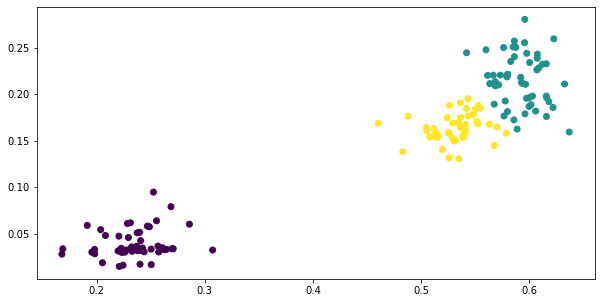

In [91]:
plt.figure(figsize=(10, 5))
plt.scatter(iris_df2['petal length (cm)'], iris_df2['petal width (cm)'], c = y_kmeans)

In [ ]:
#Above two graphs are clustered clearly done with k value as 2 since there is "NO OVERLAPPING"